# toss-decision

Use the "Run" button to execute the code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IPL_Data/IPL_Matches_2008_2020.csv')
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [3]:
df = df.replace('Pune Warriors', 'Rising Pune Supergiants', regex=True)
df = df.replace('Rising Pune Supergiants', 'Rising Pune Supergiant', regex=True)
df = df.replace('Rising Pune Supergiant', 'Rising Pune Supergiants', regex=True)
df = df.replace('Delhi Daredevils', 'Delhi Capitals', regex=True)
df = df.replace('Sunrisers Hyderabad', 'Deccan Chargers', regex=True)

In [4]:
total_matches =  df.shape[0]
team_opting_bat_first = df[df['toss_decision'] == 'bat'].shape[0]
team_opting_field_first = df[df['toss_decision'] == 'field'].shape[0]

percentage_opting_bat_first = round(team_opting_bat_first*100/total_matches, 2)
percentage_opting_field_first = round(team_opting_field_first*100/total_matches, 2)

print(percentage_opting_field_first)
print(percentage_opting_bat_first)

60.78
39.22


In [56]:
#Total Appearance of all the Team
max_appearance =  df['team1'].value_counts() + df['team2'].value_counts()

#Initialize an Empty Dataframe
toss_win_df = pd.DataFrame(columns=['team', 'total_matches', 'toss_win', 'bat_first', 'field_first', 'total_wins'])

for team, count in max_appearance.items():    
    total_toss_win = df[df['toss_winner'] == team].shape[0]
    bat_first = df[(df['toss_winner'] == team)  & (df['toss_decision'] == 'bat')].shape[0]
    field_first = df[(df['toss_winner'] == team)  & (df['toss_decision'] == 'field')].shape[0]
  
    data = {'team':team, 'total_matches':count,  'toss_win':total_toss_win, 'bat_first':bat_first,  'field_first':field_first}
    toss_win_df = toss_win_df.append(data, ignore_index=True)

toss_win_df['toss_win_percentage'] = toss_win_df['toss_win']*100/toss_win_df['total_matches']
toss_win_df.sort_values('toss_win_percentage', ascending=False, inplace=True)

In [58]:
#Total Appearance of all the Team
max_appearance =  df['team1'].value_counts() + df['team2'].value_counts()

#Initialize an Empty Dataframe
toss_win_df = pd.DataFrame(columns=['team', 'total_matches', 'toss_win'])

for team, count in max_appearance.items():    
    total_toss_win = df[df['toss_winner'] == team].shape[0]
   
    data = {'team':team, 'total_matches':count,  'toss_win':total_toss_win}
    toss_win_df = toss_win_df.append(data, ignore_index=True)

toss_win_df['toss_win_percentage'] = toss_win_df['toss_win']*100/toss_win_df['total_matches']
toss_win_df.sort_values('toss_win_percentage', ascending=False, inplace=True)

In [59]:
toss_win_df

,team,total_matches,toss_win,toss_win_percentage
5,Kochi Tuskers Kerala,14,8,57.142857
0,Chennai Super Kings,178,97,54.494382
8,Rajasthan Royals,161,87,54.037267
7,Mumbai Indians,203,106,52.216749
2,Delhi Capitals,194,100,51.546392
6,Kolkata Knight Riders,192,98,51.041667
1,Deccan Chargers,199,100,50.251256
3,Gujarat Lions,30,15,50.0
4,Kings XI Punjab,190,85,44.736842
10,Royal Challengers Bangalore,195,87,44.615385


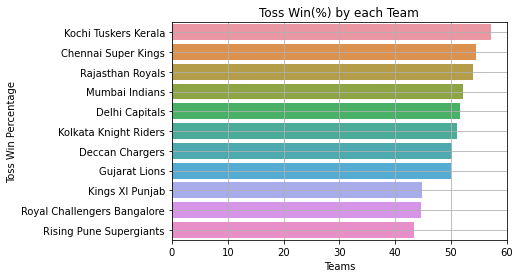

In [60]:
ax=sns.barplot(x='toss_win_percentage', y='team', data=toss_win_df)
ax.set(xlabel="Teams", ylabel='Toss Win Percentage', title="Toss Win(%) by each Team")
plt.grid() 
plt.show()

In [70]:
#Total Appearance of all the Team
max_appearance =  df['team1'].value_counts() + df['team2'].value_counts()

#Initialize an Empty Dataframe
win_df = pd.DataFrame(columns=['team', 'total_matches', 'toss_win', 'bat_first', 'field_first', 'total_wins'])

for team, count in max_appearance.items():    
    total_toss_win = df[df['toss_winner'] == team].shape[0]
   
    bat_first = df[(df['toss_winner'] == team)  & (df['toss_decision'] == 'bat')].shape[0]
    field_first = df[(df['toss_winner'] == team)  & (df['toss_decision'] == 'field')].shape[0]
   
    total_wins =  df[(df['winner'] == team)].shape[0]
   
    data = {'team':team, 'total_matches':count,  'toss_win':total_toss_win, 
            'bat_first':bat_first,  'field_first':field_first,
            'total_wins':total_wins}
    
    win_df = win_df.append(data, ignore_index=True)

win_df['toss_win_percentage'] = win_df['toss_win']*100/win_df['total_matches']
win_df['total_win_percentage'] = win_df['total_wins']*100/win_df['total_matches']
win_df['toss_win_impact'] = win_df['total_win_percentage']> win_df['toss_win_percentage']
win_df.sort_values('total_win_percentage', ascending=False, inplace=True)

In [73]:
win_df[win_df['toss_win_impact'] == True]

,team,total_matches,toss_win,bat_first,field_first,total_wins,toss_win_percentage,total_win_percentage,toss_win_impact
0,Chennai Super Kings,178,97,51,46,106,54.494382,59.550562,True
7,Mumbai Indians,203,106,48,58,120,52.216749,59.1133,True
6,Kolkata Knight Riders,192,98,34,64,99,51.041667,51.5625,True
10,Royal Challengers Bangalore,195,87,24,63,91,44.615385,46.666667,True
4,Kings XI Punjab,190,85,27,58,88,44.736842,46.315789,True
